# NYC New Measles Cases Daily Average (2018-2019)

* This Jupyter/Python notebook creates a filled step plot of the 2018-2019 NYC New Measles Cases Daily Average and saves it as an PSVG image.
* This notebook is part of the "measles" GitHub project: https://github.com/carlos-afonso/measles
* Author: Carlos Afonso: https://carlos-afonso.github.io
* Date: July 17, 2019

In [1]:
# Import libraries
from datetime import datetime, timedelta
from matplotlib.dates import DateFormatter
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
# Import the data as a dataframe
data_file = '../data/nyc_health_measles_cases_by_date.csv'
df = pd.read_csv(data_file)

# Check the importanted data
df

,date,cases
0,2019-03-27,214
1,2019-04-03,259
2,2019-04-08,285
3,2019-04-15,329
4,2019-04-18,359
5,2019-04-24,390
6,2019-04-29,423
7,2019-05-06,466
8,2019-05-13,498
9,2019-05-24,535


In [5]:
# Transform the 'date' column from string to datetime objects
if isinstance(df['date'].iloc[0], str):
    df['date'] = df['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').date())

# Add a new column with the day difference between consecutive rows
df['day_diff'] = [np.nan] + [(df['date'].iloc[k+1] - df['date'].iloc[k]).days for k in range(len(df) - 1)]

# Add a new column with the difference in the number of measles cases between consecutive rows
df['cases_diff'] = [np.nan] + list(df['cases'].iloc[1:].values - df['cases'].iloc[:-1].values)

# Compute the new cases daily average
df['cases_day_avg'] = df['cases_diff'] / df['day_diff']

# Check the results
df

,date,cases,day_diff,cases_diff,cases_day_avg
0,2019-03-27,214,NaN,NaN,NaN
1,2019-04-03,259,7.0,45.0,6.428571
2,2019-04-08,285,5.0,26.0,5.200000
3,2019-04-15,329,7.0,44.0,6.285714
4,2019-04-18,359,3.0,30.0,10.000000
5,2019-04-24,390,6.0,31.0,5.166667
6,2019-04-29,423,5.0,33.0,6.600000
7,2019-05-06,466,7.0,43.0,6.142857
8,2019-05-13,498,7.0,32.0,4.571429
9,2019-05-24,535,11.0,37.0,3.363636


In [6]:
# Create a list of dates to display in teh x-axis of the plot
start = datetime(2019, 3, 25).date()
end = datetime(2019, 7, 22).date()
xaxis_dates = [start + timedelta(days = x) for x in range(0, (end - start).days, 14)]
xaxis_dates

[datetime.date(2019, 3, 25),
 datetime.date(2019, 4, 8),
 datetime.date(2019, 4, 22),
 datetime.date(2019, 5, 6),
 datetime.date(2019, 5, 20),
 datetime.date(2019, 6, 3),
 datetime.date(2019, 6, 17),
 datetime.date(2019, 7, 1),
 datetime.date(2019, 7, 15)]

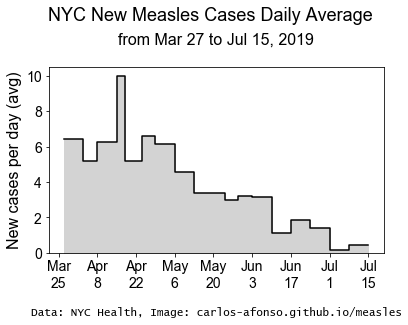

In [7]:
fn = 'Arial' # fontname to use

fig, ax = plt.subplots()

fig.suptitle('NYC New Measles Cases Daily Average', fontname = fn, fontsize = 18)

fig.subplots_adjust(top = 0.77)

subtitle = 'from ' + df['date'].iloc[0].strftime('%b %d') + ' to ' + df['date'].iloc[-1].strftime('%b %d, %Y') + '\n'

plt.title(subtitle, fontname = fn, fontsize = 16)

# Create the step plot
ax.step(df['date'], df['cases_day_avg'], where = 'pre', color = 'black')

extended_values = [df['cases_day_avg'].iloc[1]] + list(df['cases_day_avg'].iloc[1:].values)

# Add the filling under the step plot
ax.fill_between(df['date'].values, 0, extended_values, color = 'lightgray', step = 'pre')
# color options: 'lightgray', 'whitesmoke'

ax.set_xticks(xaxis_dates)

ax.xaxis.set_major_formatter(DateFormatter('%b\n%#d'))
# date format options: '%b\n%#d', '%#d\n%b'

ax.set_ylim([0, 10.5])

plt.ylabel('New cases per day (avg)', fontname = fn, fontsize = 16)

plt.xticks(fontname = fn, fontsize = 14)
plt.yticks(fontname = fn, fontsize = 14)

# We don't need to label the x-axis, so we can use xlabel for an annotation about the Data/Image sources
plt.xlabel(
    '\nData: NYC Health, Image: carlos-afonso.github.io/measles', 
    fontname = 'Lucida Console', fontsize = 11
)

plt.show()

In [9]:
# Save the plot has an SVG image
fig.savefig('../images/nyc_new_measles_cases_daily_avg_stepplot_py.svg', bbox_inches = 'tight')